In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [10]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
    })
df

,beta,exponential,normal_p,normal_l
0,46.950743,23.202385,9.975854,3.997285
1,36.865488,9.532666,10.799875,11.754758
2,23.223782,15.811519,8.394611,23.316012
3,53.800620,25.206757,10.019745,15.344868
4,54.591842,18.065912,9.660126,9.106633
...,...,...,...,...
995,37.283588,12.956244,11.523528,9.137654
996,50.729447,2.679881,9.965514,-1.363622
997,59.555258,8.976974,12.813045,14.119029
998,33.769053,6.552127,10.101728,-5.067567


In [11]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,46.950743,23.202385,9.975854,3.997285,18.512135
1,36.865488,9.532666,10.799875,11.754758,23.426348
2,23.223782,15.811519,8.394611,23.316012,23.683725
3,53.800620,25.206757,10.019745,15.344868,18.736282
4,54.591842,18.065912,9.660126,9.106633,19.981253


<AxesSubplot:ylabel='Density'>

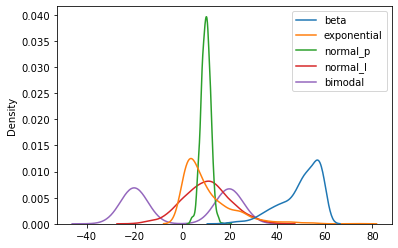

In [12]:
#Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [13]:
#Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.988621,10.488722,9.949799,10.248781,-0.190623
std,8.452036,10.377338,1.974705,9.846889,20.229225
min,16.931334,0.023702,3.641361,-19.967511,-30.968023
25%,45.224751,3.104248,8.603288,3.578031,-20.185190
50%,52.124195,6.934833,9.970599,10.192311,-0.735064
75%,56.626705,14.792023,11.291944,16.518083,19.833828
max,59.989256,73.876454,19.190947,39.943431,28.489610


<AxesSubplot:ylabel='Density'>

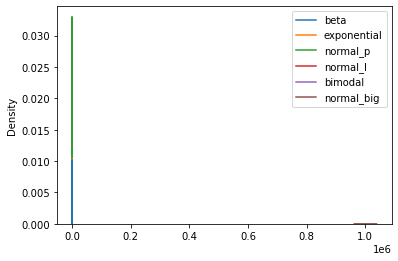

In [14]:
#thêm 1 đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

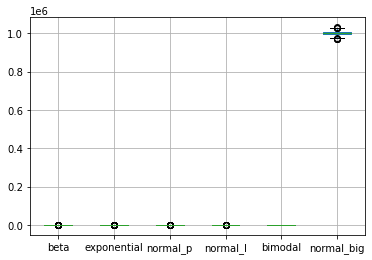

In [15]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [16]:
#Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.359605,1.225750,0.013201,-0.635188,0.925004,-0.737853
1,-1.553436,-0.092175,0.430698,0.153016,1.168052,1.513032
2,-3.168258,0.513182,-0.787948,1.327706,1.180781,0.704575
3,0.451241,1.418996,0.035439,0.517792,0.936090,0.087808
4,0.544901,0.730532,-0.146765,-0.116049,0.997664,2.227206


<AxesSubplot:ylabel='Density'>

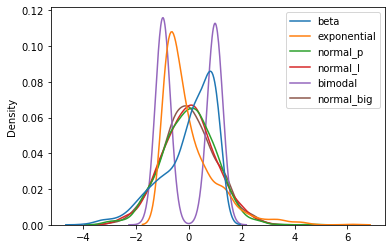

In [17]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [18]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.696243e-17,-5.015433e-17,5.107026e-16,1.459943e-16,1.321165e-16,-7.500722e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.913119e+00,-1.008954e+00,-3.196222e+00,-3.070148e+00,-1.522194e+00,-2.985985e+00
25%,-5.639178e-01,-7.119523e-01,-6.822207e-01,-6.777864e-01,-9.888946e-01,-6.510280e-01
50%,2.527962e-01,-3.426378e-01,1.053885e-02,-5.737618e-03,-2.692704e-02,-1.945173e-02
75%,7.857758e-01,4.148901e-01,6.800091e-01,6.369970e-01,9.903727e-01,6.536792e-01
max,1.183814e+00,6.111341e+00,4.682104e+00,3.017147e+00,1.418472e+00,3.020026e+00


<AxesSubplot:>

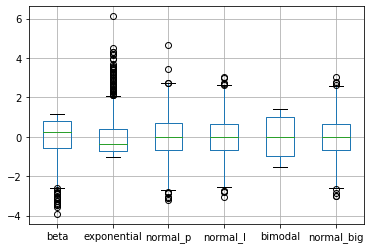

In [19]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()